# Instalación de qiskit

In [18]:
!pip install qiskit
!pip -q install -U qiskit qiskit-aer
!pip install 'qiskit[visualization]'
!pip -q install -U "qiskit[visualization]" qiskit-aer

Se definen las librerias necesarias y se comprueba la version de qiskit utilizada

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import GroverOperator
from qiskit_aer import AerSimulator
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error)

Se define la funcion oraculo (en este caso Grover) y se construye el circuito grover simulando el circuito necesario para su implementación

In [3]:
oracle = QuantumCircuit(2)
oracle.cz(0, 1)

grover_op = GroverOperator(oracle)

qc = QuantumCircuit(2, 2)
qc.h([0, 1])
qc.compose(grover_op, inplace=True)
qc.measure([0, 1], [0, 1])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18284\1273950471.py:4: DeprecationWarning: The class ``qiskit.circuit.library.grover_operator.GroverOperator`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use qiskit.circuit.library.grover_operator instead.
  grover_op = GroverOperator(oracle)


Ahora se simula un circuito ideal, en otras palabras un circuito sin ruido para mostrar un escenario donde el circuito entrega en todas las ocasiones el resultado esperado

Measurement counts: {'11': 1024}


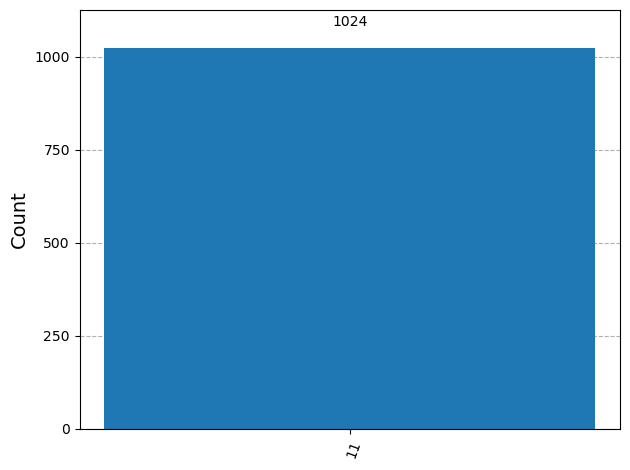

In [4]:
# 4. Simulate the Circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts(qc)

# 5. Visualize the results
print("Measurement counts:", counts)
plot_histogram(counts)

# Version Con Ruido
Esta versión del codigo inplementa un modelo de ruido simulando el NISQ donde los qubits presentan errores en las compuertas logicas simulando el estado actual de la computación cuantica

Measurement counts with noise: {'11': 936, '01': 32, '00': 35, '10': 21}


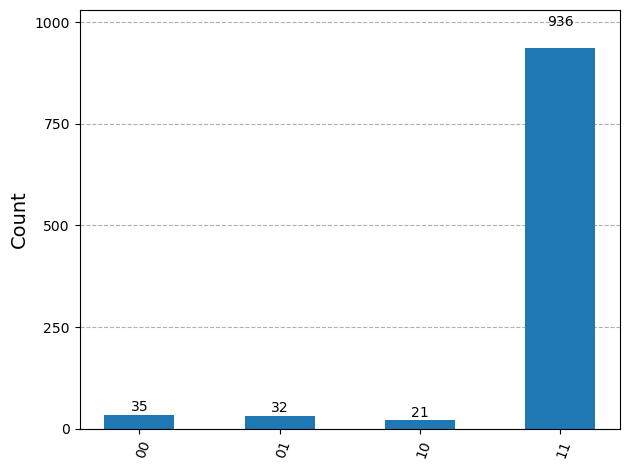

In [5]:
noise_model = NoiseModel()

error_1q = depolarizing_error(0.02, 1)  # 2% de error
error_2q = depolarizing_error(0.05, 2)  # 5% de error

noise_model.add_all_qubit_quantum_error(error_1q, ['h'])
noise_model.add_all_qubit_quantum_error(error_2q, ['cx', 'cz'])

simulator = AerSimulator(noise_model=noise_model)
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts(qc)

print("Measurement counts with noise:", counts)
plot_histogram(counts)


Ahora calculamos la fidelidad del circuito mediante el calculo de resultado esperados partido por shors totales

In [8]:
# Supongamos que el resultado esperado es '11'
expected_result = '11'

# Número de veces que obtuvimos el resultado esperado
hits = counts.get(expected_result, 0)
shots=1024

fidelity = hits / shots
print(f"Fidelidad del resultado esperado '{expected_result}': {fidelity:.4f}")


Fidelidad del resultado esperado '11': 0.9141
